In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from prepare import *
from acquire import *

In [2]:
df = get_all_data()

Reading sales from local csv
Reading stores from local csv
Reading items from local csv


In [3]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
def parse_sales_date(df):
    datetime_format = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date, format=datetime_format)
    return df

In [5]:
parse_sales_date(df)

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,2013-01-04,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,2013-01-05,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
5,1,12.0,2013-01-06,6,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
6,1,10.0,2013-01-07,7,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
7,1,9.0,2013-01-08,8,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
8,1,12.0,2013-01-09,9,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
9,1,9.0,2013-01-10,10,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [6]:
def add_date_parts(df):
    # year, quarter, month, day of month, day of week, weekend vs. weekday
    df['year'] = df.sale_date.dt.year
    df['quarter'] = df.sale_date.dt.quarter
    df['month'] = df.sale_date.dt.month
    df['day'] = df.sale_date.dt.day
    df['weekday'] = df.sale_date.dt.day_name().str[:3]
    df['is_weekend'] = df.weekday.str.startswith('S')
    return df

In [7]:
add_date_parts(df)

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend
0,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,1,Tue,False
1,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,2,Wed,False
2,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,3,Thu,False
3,1,13.0,2013-01-04,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,4,Fri,False
4,1,10.0,2013-01-05,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,5,Sat,True
5,1,12.0,2013-01-06,6,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,6,Sun,True
6,1,10.0,2013-01-07,7,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,7,Mon,False
7,1,9.0,2013-01-08,8,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,8,Tue,False
8,1,12.0,2013-01-09,9,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,9,Wed,False
9,1,9.0,2013-01-10,10,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2013,1,1,10,Thu,False


In [8]:
def improve_sales_data(df):
    df['sale_total'] = df.sale_amount * df.item_price
    return df.rename(columns={'sale_amount': 'quantity'})
improve_sales_data(df)

,item_id,quantity,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_city,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total
0,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,1,Tue,False,10.92
1,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,2,Wed,False,9.24
2,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,3,Thu,False,11.76
3,1,13.0,2013-01-04,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,4,Fri,False,10.92
4,1,10.0,2013-01-05,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,5,Sat,True,8.40
5,1,12.0,2013-01-06,6,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,6,Sun,True,10.08
6,1,10.0,2013-01-07,7,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,7,Mon,False,8.40
7,1,9.0,2013-01-08,8,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,8,Tue,False,7.56
8,1,12.0,2013-01-09,9,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,9,Wed,False,10.08
9,1,9.0,2013-01-10,10,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,San Antonio,TX,78253,2013,1,1,10,Thu,False,7.56


In [9]:
def add_sales_difference(df):
    df['diff_from_last_day'] = df.sale_total.diff()
    return df
add_sales_difference(df)

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,store_state,store_zipcode,year,quarter,month,day,weekday,is_weekend,sale_total,diff_from_last_day
0,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,1,Tue,False,10.92,NaN
1,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,2,Wed,False,9.24,-1.68
2,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,3,Thu,False,11.76,2.52
3,1,13.0,2013-01-04,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,4,Fri,False,10.92,-0.84
4,1,10.0,2013-01-05,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,5,Sat,True,8.40,-2.52
5,1,12.0,2013-01-06,6,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,6,Sun,True,10.08,1.68
6,1,10.0,2013-01-07,7,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,7,Mon,False,8.40,-1.68
7,1,9.0,2013-01-08,8,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,8,Tue,False,7.56,-0.84
8,1,12.0,2013-01-09,9,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,9,Wed,False,10.08,2.52
9,1,9.0,2013-01-10,10,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,TX,78253,2013,1,1,10,Thu,False,7.56,-2.52


In [10]:
df.item_brand.value_counts()

Usda Produce              36520
Elmers                    18260
Moms Best Naturals        18260
Amys                      18260
Petmate                   18260
Honest Tea                18260
Heinz                     18260
Caress                    18260
Van De Kamps              18260
Careone                   18260
Ferrara                   18260
Suave                     18260
Triaminic                 18260
Barefoot                  18260
Zhenas Gypsy Tea          18260
Back To Nature            18260
Riceland                  18260
Choice                    18260
Betty Crocker             18260
Boars Head                18260
Bear Naked                18260
Halls                     18260
Kelloggs                  18260
Twinings Of London        18260
Pamprin                   18260
Dove                      18260
Hood                      18260
Earths Best               18260
Ahold                     18260
The First Years           18260
P.f. Changs               18260
Garnier 

In [11]:
d_df = df[df['store_id']==2]
d_df = d_df[d_df['item_brand']=='Zhenas Gypsy Tea']

In [12]:
d_df['y'] = d_df.sale_amount * d_df.item_price
d_df['ds'] = pd.to_datetime(d_df.sale_date)
d_df = d_df.groupby(['ds'])['y'].sum().reset_index()

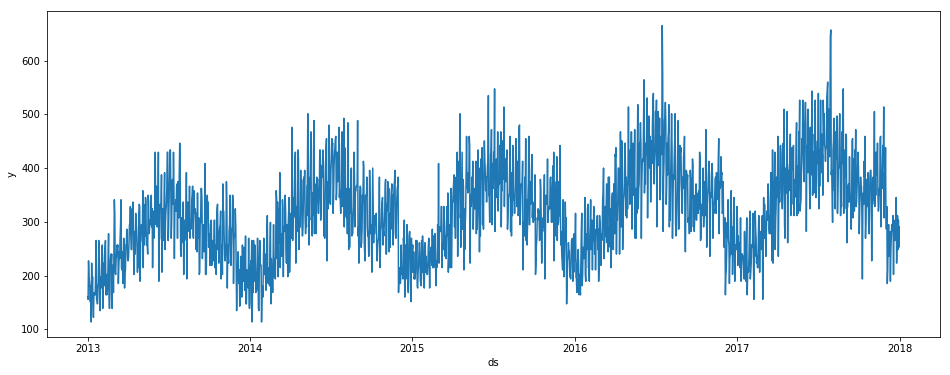

In [13]:
plt.figure(figsize=(16,6))
sns.lineplot(d_df.ds, d_df.y)

In [14]:
d_df['cap'] = 600
d_df['floor'] = 100

m = Prophet(growth='logistic', changepoint_range=0.9)
m.fit(d_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=30)
future['cap'] = 600
future['floor'] = 100
print(future.head())
print(future.tail())
print(d_df.tail())

          ds  cap  floor
0 2013-01-01  600    100
1 2013-01-02  600    100
2 2013-01-03  600    100
3 2013-01-04  600    100
4 2013-01-05  600    100
             ds  cap  floor
1851 2018-01-26  600    100
1852 2018-01-27  600    100
1853 2018-01-28  600    100
1854 2018-01-29  600    100
1855 2018-01-30  600    100
             ds       y  cap  floor
1821 2017-12-27  311.54  600    100
1822 2017-12-28  248.39  600    100
1823 2017-12-29  303.12  600    100
1824 2017-12-30  252.60  600    100
1825 2017-12-31  290.49  600    100


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1851,2018-01-26,299.214440,248.458358,351.442279
1852,2018-01-27,323.130447,267.188193,378.656273
1853,2018-01-28,346.391349,292.598397,395.155545
1854,2018-01-29,224.288694,169.206973,275.418174
1855,2018-01-30,265.340415,212.274384,317.916886


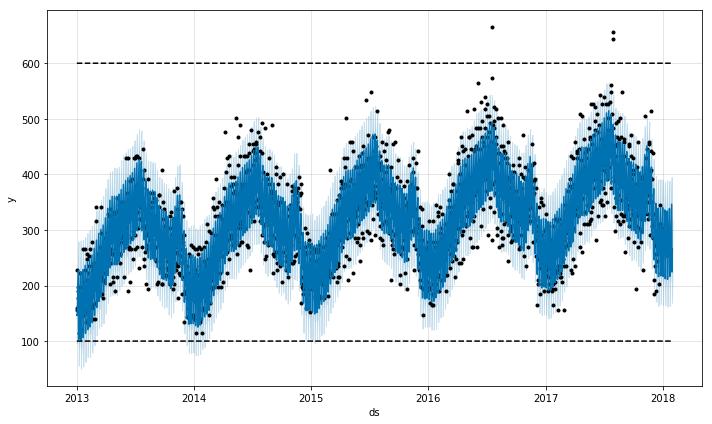

In [17]:
fig1 = m.plot(forecast)

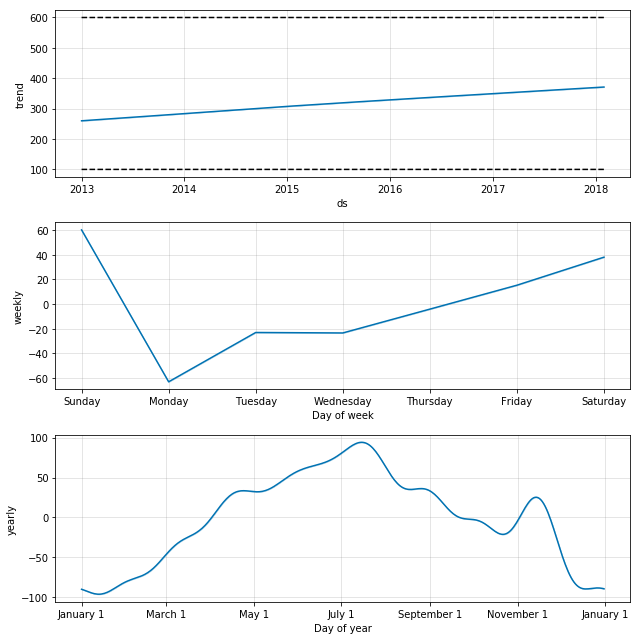

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='90 days')


df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 33 forecasts with cutoffs between 2013-10-23 00:00:00 and 2017-10-02 00:00:00


,horizon,mse,rmse,mae,mape,coverage
278,9 days,2024.748952,44.997210,35.250927,0.117660,0.683502
1899,10 days,2037.806540,45.142071,35.454141,0.118070,0.680135
369,10 days,2041.797773,45.186256,35.524935,0.118269,0.680135
639,10 days,2041.942027,45.187853,35.526630,0.117942,0.683502
729,10 days,2039.766873,45.163778,35.459471,0.117778,0.683502


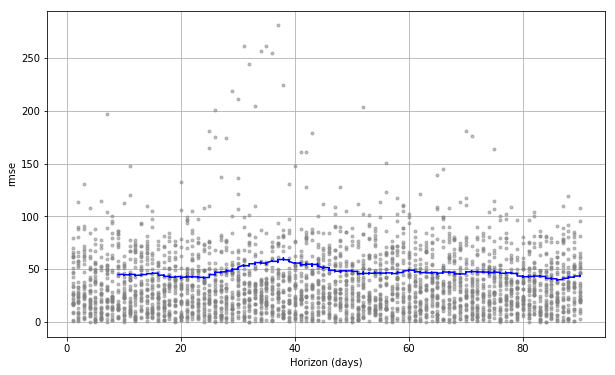

In [20]:
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component

# plot_forecast_component(m, forecast, 'yhat')

fig3 = plot_cross_validation_metric(df_cv, metric='rmse')